# Statistics Excersise on College Dataset

This dataset is from the *Introduction to Statistical Learning* book's <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">website</a>. 

___
The purpose of this excersize is to apply some basic probability theory to this dataset.
Make some predictions and report some statistics.
___

## The Data

The data has 777 observations on the following 18 variables.
* Private: public/private indicator
* Apps: number of applications received
* Accept: number of applications accepted
* Enroll: number of new students enrolled
* Top10perc: new students from top 10% of H.S. class
* Top25perc: new students from top 25% of H.S. class
* F.Undergrad: number of fulltime undergraduates
* P.Undergrad: number of parttime undergraduates
* Outstate: out-of-state tuition
* Room.Board: room and board costs
* Books: estimated book costs
* Personal: estimated personal spending
* PhD: percent of faculty with Ph.D.’s
* Terminal: percentt of faculty with terminal degree
* S.F.Ratio: student/faculty ratio
* perc.alumni: percent alumni who donate
* Expend: instructional expenditure per student
* Grad.Rate: graduation rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# load data into a pandas dataframe
df = pd.read_csv('College_Data')

In [3]:
# check out the first 5 observations
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# get info on the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


## Check out the distribution of graduation rates for all the colleges

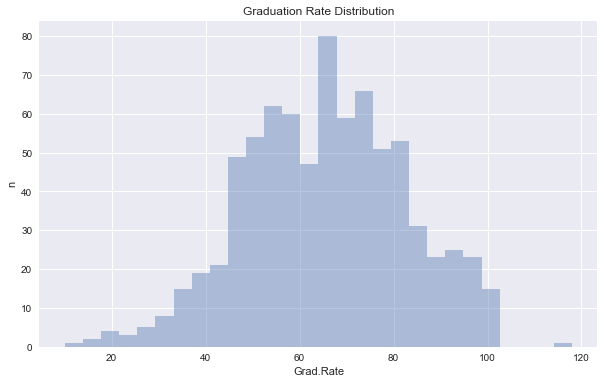

In [26]:
n_bins = int(np.ceil(np.sqrt(len(df.index))))  # calculate # of bins
f = plt.figure(figsize=(10,6))
sns.distplot(df['Grad.Rate'],bins=n_bins,kde=False)
plt.ylabel('n')
plt.title('Graduation Rate Distribution')

This distribution looks normaly distributed

## Some basic stats the manual way:

In [7]:
# homebrewed mean
my_mean = df['Grad.Rate'].sum()/df['Grad.Rate'].count()

# defining a function for the variance
def var_fun(x, mu):
    """
    var_fun:(sample population, sample mean)
        
        Calculates the variance of a sample population given its mean
    """
    x = x.values
    my_vari = sum([(item-mu)**2 for item in x])/len(x)
    return my_vari
my_var = var_fun(df['Grad.Rate'], my_mean)

print('Basic stats for graduation rate the "homebrew" way:')
print('The mean graduation rate is ' + str(round(my_mean,3)))
print('The variance is ' + str(round(my_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(my_var),3)))


Basic stats for graduation rate the "homebrew" way:
The mean graduation rate is 65.463
The variance is 294.694
The standard deviation is 17.167


## Some basic stats the "Python way":

In [9]:
py_mean = df['Grad.Rate'].mean()
py_var = df['Grad.Rate'].var()
py_std = df['Grad.Rate'].std()

print('Basic stats for graduation rate the Python way:')
print('The mean graduation rate is ' + str(round(py_mean,3)))
print('The variance is ' + str(round(py_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(py_var),3)))

Basic stats for graduation rate the Python way:
The mean graduation rate is 65.463
The variance is 295.074
The standard deviation is 17.178


or... we could use the one-liner from the Pandas library:

In [10]:
df['Grad.Rate'].describe()

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64

** This dataset is made up of both private and public colleges. Let's see the difference in graduation rates:**

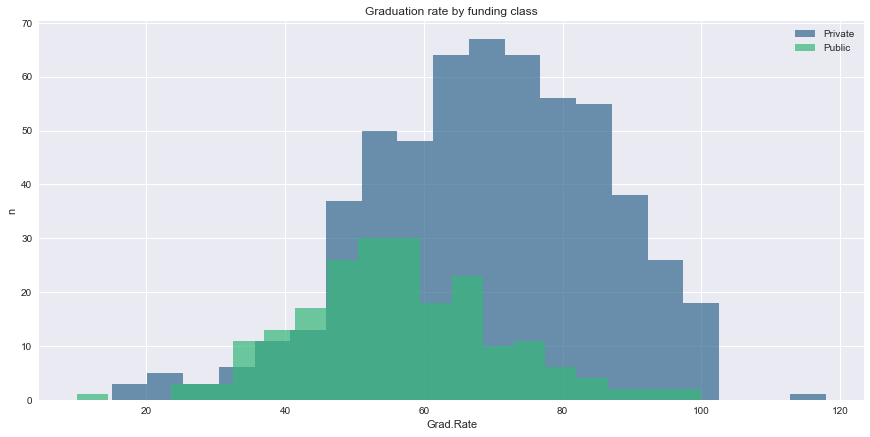

In [27]:
g = sns.FacetGrid(df,hue="Private",palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(['Private','Public'])
plt.ylabel('n')
plt.title('Graduation rate by funding class')

From this plot, it looks like private colleges, on average have a higher graduation rate. Lets calculate the mean for each.

In [22]:
priv_or_pub = df.groupby('Private').mean()
priv_or_pub['Grad.Rate']

Private
No     56.042453
Yes    68.998230
Name: Grad.Rate, dtype: float64

** A classic graph in statistics to investigate how the data is dispersed throughout the set **

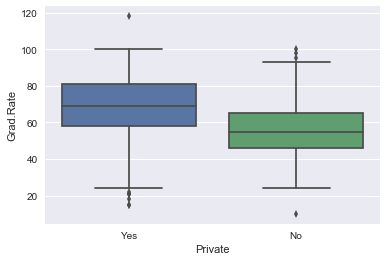

In [39]:
sns.boxplot(x='Private',y='Grad.Rate',data=df)